In [1]:
import os
import torch
import matplotlib.pyplot as plt

In [2]:
def load_checkpoint(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    return checkpoint['epoch'], checkpoint['loss']

In [3]:
def get_loss(save_dir):
    checkpoints = [f for f in os.listdir(save_dir) if f.startswith('checkpoint_')]
    checkpoints = sorted(checkpoints, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    epochs = []
    losses = []
    for checkpoint_file in checkpoints:
        epoch, loss = load_checkpoint(os.path.join(save_dir, checkpoint_file))
        epochs.append(epoch)
        losses.append(loss)
    
    return epochs, losses

In [4]:
def plot_loss(epochs, losses, save_dir = None):
    plt.plot(epochs, losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Evolution')
    plt.legend()
    plt.grid(True)
    
    if save_dir:
        plt.savefig(os.path.join(save_dir, "loss.jpg"))
        print(f"saved image at {save_dir}")

In [5]:
folder_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
save_dir = os.path.join(folder_path, "test_diffusion_model", "test1")
epochs, losses = get_loss(save_dir)

saved image at /home/FibreAug/test_diffusion_model/test1


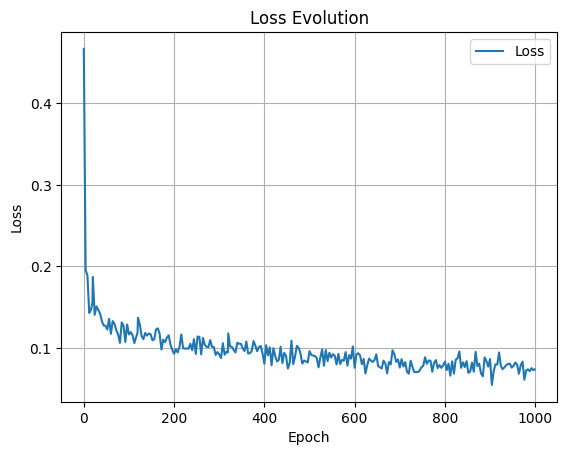

In [6]:
plot_loss(epochs, losses, save_dir)